# Plot parallel coordinates to explore factor impacts on VGG16 model

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

df = pd.read_csv('/media/visiopharm5/WDGold/deeplearning/Hepatocarcinomes/models/5x/test_ModelDesign/performance2.csv', sep=';')

In [64]:
# df = df.dropna()
df.dtypes

VGG16Arch        object
fcOrGap          object
optimizer        object
batch size        int64
val acc         float64
epoch acc         int64
avg val acc     float64
val loss        float64
epoch loss        int64
avg val loss    float64
AUC             float64
mean AUC        float64
dtype: object

In [65]:
df['AUC'] = pd.cut(df['AUC'], [0.82, 0.83, 0.84, 0.85, 0.86, 0.87])

df['epoch acc'] = df [['epoch acc']].astype('int')
df['epoch loss'] = df [['epoch loss']].astype('int')

In [66]:
df.VGG16Arch = df.VGG16Arch.astype('category')
df['VGG16Arch '] = df.VGG16Arch.cat.codes

df.fcOrGap = df.fcOrGap.astype('category')
df['fcOrGap '] = df.fcOrGap.cat.codes

df.optimizer = df.optimizer.astype('category')
df['optimizer '] = df.optimizer.cat.codes

df['batch size']= df['batch size'].astype('category')
df['batch size '] = df['batch size'].cat.codes


In [67]:
df.dtypes

VGG16Arch       category
fcOrGap         category
optimizer       category
batch size      category
val acc          float64
epoch acc          int64
avg val acc      float64
val loss         float64
epoch loss         int64
avg val loss     float64
AUC             category
mean AUC         float64
VGG16Arch           int8
fcOrGap             int8
optimizer           int8
batch size          int8
dtype: object

In [68]:
df.replace({"vgg16": "VGG16", "vgg16own":"VGG16Base", "dropv1": "VGG16DrV1", "dropv2": "VGG16DrV2", 
            "dropv3": "VGG16DrV3", "bnv1": "VGG16BnV1", "bnv2": "VGG16BnV2", "dropbnv1": "VGG16DrBnV1",
            "fc": "FC512", "fcl2": "FC512L2", "gap": "GAP", "sgd": "SGD", "adam":"Adam"}, inplace=True)
df.rename(columns={"VGG16Arch": "Backbone", "VGG16Arch ": "Backbone ", "val acc": 'Val Acc', "fcOrGap": 'Head',
                   "fcOrGap ": 'Head ', "batch size": 'Batch Size', "batch size ": 'Batch Size ',
                   "val loss": 'Val Loss', "optimizer": 'Optimizer', "optimizer ": 'Optimizer '}, inplace=True)
df.head(5)

,Backbone,Head,Optimizer,Batch Size,Val Acc,epoch acc,avg val acc,Val Loss,epoch loss,avg val loss,AUC,mean AUC,Backbone,Head,Optimizer,Batch Size
0,VGG16,FC512L2,Adam,64,0.8813,9,0.882067,0.3003,9,0.306400,"(0.85, 0.86]",0.849333,6,1,0,1
1,VGG16,FC512L2,Adam,64,0.8808,17,NaN,0.3104,9,NaN,"(0.84, 0.85]",NaN,6,1,0,1
2,VGG16,FC512L2,Adam,64,0.8841,15,NaN,0.3085,8,NaN,"(0.84, 0.85]",NaN,6,1,0,1
3,VGG16,FC512L2,Adam,128,0.8798,22,0.881033,0.3275,11,0.311367,"(0.85, 0.86]",0.849000,6,1,0,2
4,VGG16,FC512L2,Adam,128,0.8836,7,NaN,0.2997,7,NaN,"(0.84, 0.85]",NaN,6,1,0,2


In [69]:
df.Backbone = df.Backbone.astype('category')
df.Head = df.Head.astype('category')
df.dtypes

Backbone        category
Head            category
Optimizer         object
Batch Size      category
Val Acc          float64
epoch acc          int64
avg val acc      float64
Val Loss         float64
epoch loss         int64
avg val loss     float64
AUC             category
mean AUC         float64
Backbone            int8
Head                int8
Optimizer           int8
Batch Size          int8
dtype: object

/home/visiopharm5/anaconda3/envs/clam/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


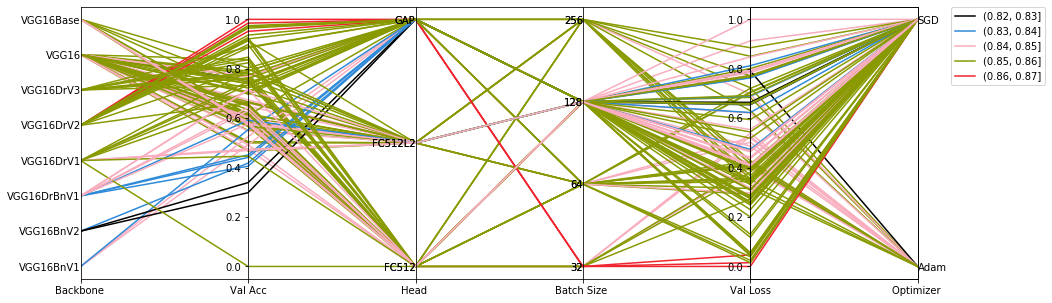

In [72]:
#For some unknown reason, have to reload data before each plotting, 
#otherwise the ylabels will be the normalized data but not orignal ones

from matplotlib import ticker

cols = ['Backbone ', 'Val Acc', 'Head ', 'Batch Size ', 'Val Loss', 'Optimizer ']

x = [i for i, _ in enumerate(cols)]
colours = ['#000000', '#2e8ad8', '#f9adbe', '#889a00', '#ef242e']

# create dict of categories: colours
colours = {df['AUC'].cat.categories[i]: colours[i] for i, _ in enumerate(df['AUC'].cat.categories)}

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

# Plot each row
for i, ax in enumerate(axes):
    for idx in df.index:
        auc_category = df.loc[idx, 'AUC']
        ax.plot(x, df.loc[idx, cols], colours[auc_category])
        if i in [0, 2, 3]:
#         if i not in [1,5]:
            ax.axes.get_yaxis().set_visible(False)
#         elif i in [4,6]:
#             ticks = [7,15,23,30,37,45]
#             ax.yaxis.set_ticks(ticks)
#             ax.set_yticklabels(tick_labels)
# #             ax.axes.get_yaxis([7,15,23,30,37,45])
    ax.set_xlim([x[i], x[i+1]])
    for i,(label,val) in df.loc[:,['Backbone','Backbone ']].drop_duplicates().iterrows():
        ax.annotate(label, xy=(0,val), ha='right', va='center_baseline')
    for i,(label,val) in df.loc[:,['Head','Head ']].drop_duplicates().iterrows():
        ax.annotate(label, xy=(2,val), ha='right', va='center_baseline')
    for i,(label,val) in df.loc[:,['Batch Size','Batch Size ']].drop_duplicates().iterrows():
        ax.annotate(label, xy=(3,val), ha='right', va='center_baseline')
#     for i,(label,val) in df.loc[:,['epoch acc- ','epoch acc']].drop_duplicates().iterrows():
#         ax.annotate(label, xy=(3,val), ha='left', va='center_baseline')
#     for i,(label,val) in df.loc[:,['epoch loss- ','epoch loss']].drop_duplicates().iterrows():
#         ax.annotate(label, xy=(6,val), ha='left', va='center_baseline')
    for i,(label,val) in df.loc[:,['Optimizer','Optimizer ']].drop_duplicates().iterrows():
        ax.annotate(label, xy=(5,val), ha='left', va='center_baseline')
    
# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalised data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    if dim in [3,6]:
        tick_labels=[int(i) for i in tick_labels]
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[dim]], fontsize=10)

    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([cols[-2], cols[-1]]) #why the setting of fontsize didn't work?
ax.set_yticks([])

# Remove space between subplots
plt.subplots_adjust(wspace=0)

# Add legend to plot
plt.legend(
    [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df['AUC'].cat.categories],
    df['AUC'].cat.categories,
    bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

# plt.title("Values of model attributes by AUC category")

plt.savefig('/home/visiopharm5/Documents/parallel_coordinates.png', bbox_inches = "tight", dpi=1500)

plt.show()